# Brewers Technical 

**Author:** Caitlan Krasinski

**Role:** Baseball Systems Intern 

### Imports

In [102]:
import pandas as pd
from pandasql import sqldf
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot 
from matplotlib.pyplot import figure

### Load data 

In [2]:
df = pd.read_csv('20220423-Olsen-1.csv')

In [3]:
df.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,PitchLocationConfidence,CatcherThrowLocationConfidence,CatcherThrowReleaseConfidence,PitchMovementConfidence
0,1,2022-04-23,14:02:20.23,1,1,"Dallas, Micah",1000058245,Right,TEX_AGG,"Webb, Braydon",...,NaN,NaN,High,Low,Low,NaN,High,NaN,NaN,High
1,2,2022-04-23,14:02:56.33,2,1,"Dallas, Micah",1000058245,Right,TEX_AGG,"Slavens, Brady",...,NaN,NaN,High,High,Low,NaN,High,NaN,NaN,High
2,3,2022-04-23,14:03:16.64,2,2,"Dallas, Micah",1000058245,Right,TEX_AGG,"Slavens, Brady",...,NaN,NaN,High,NaN,NaN,NaN,High,NaN,NaN,High
3,4,2022-04-23,14:03:32.58,2,3,"Dallas, Micah",1000058245,Right,TEX_AGG,"Slavens, Brady",...,NaN,NaN,High,NaN,NaN,NaN,High,NaN,NaN,High
4,5,2022-04-23,14:03:48.06,2,4,"Dallas, Micah",1000058245,Right,TEX_AGG,"Slavens, Brady",...,NaN,NaN,High,High,Medium,NaN,High,NaN,NaN,High


In [16]:
for col in df.columns: print(col) 

PitchNo
Date
Time
PAofInning
PitchofPA
Pitcher
PitcherId
PitcherThrows
PitcherTeam
Batter
BatterId
BatterSide
BatterTeam
PitcherSet
Inning
Top/Bottom
Outs
Balls
Strikes
TaggedPitchType
AutoPitchType
PitchCall
KorBB
TaggedHitType
PlayResult
OutsOnPlay
RunsScored
Notes
RelSpeed
VertRelAngle
HorzRelAngle
SpinRate
SpinAxis
Tilt
RelHeight
RelSide
Extension
VertBreak
InducedVertBreak
HorzBreak
PlateLocHeight
PlateLocSide
ZoneSpeed
VertApprAngle
HorzApprAngle
ZoneTime
ExitSpeed
Angle
Direction
HitSpinRate
PositionAt110X
PositionAt110Y
PositionAt110Z
Distance
LastTrackedDistance
Bearing
HangTime
pfxx
pfxz
x0
y0
z0
vx0
vy0
vz0
ax0
ay0
az0
HomeTeam
AwayTeam
Stadium
Level
League
GameID
PitchUID
EffectiveVelo
SpeedDrop
PitchLastMeasuredX
PitchLastMeasuredY
PitchLastMeasuredZ
MaxHeight
MeasuredDuration
ContactPositionX
ContactPositionY
ContactPositionZ
GameUID
PlayID
UTCDate
UTCTime
LocalDateTime
UTCDateTime
AutoHitType
System
HomeTeamForeignID
AwayTeamForeignID
GameForeignID
Catcher
CatcherId
Catc

### Investigate and Process 

After examining the data by eye in the csv

**topic idea:** look at a pitcher's performance over the course of a game using all attributes

Deciding to process and explore data using SQL instead of pandas/python for ease since it sounds like it would be the primary language used in the role

 - using pandasql and a jupyter notebook is the easiest way to perform sql queries on a csv and display the output
 - by using a notebook you will be able to better see my thought process and how I change queries to look at different information as ideas come into my head

 most substance and conclusions are detailed at the end of the notebook 

In [9]:
query = '''
    SELECT * 
    FROM df 
    LIMIT 10
'''
sqldf(query, globals())

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,PitchLocationConfidence,CatcherThrowLocationConfidence,CatcherThrowReleaseConfidence,PitchMovementConfidence
0,1,2022-04-23,14:02:20.23,1,1,"Dallas, Micah",1000058245,Right,TEX_AGG,"Webb, Braydon",...,None,None,High,Low,Low,None,High,None,None,High
1,2,2022-04-23,14:02:56.33,2,1,"Dallas, Micah",1000058245,Right,TEX_AGG,"Slavens, Brady",...,None,None,High,High,Low,None,High,None,None,High
2,3,2022-04-23,14:03:16.64,2,2,"Dallas, Micah",1000058245,Right,TEX_AGG,"Slavens, Brady",...,None,None,High,None,None,None,High,None,None,High
3,4,2022-04-23,14:03:32.58,2,3,"Dallas, Micah",1000058245,Right,TEX_AGG,"Slavens, Brady",...,None,None,High,None,None,None,High,None,None,High
4,5,2022-04-23,14:03:48.06,2,4,"Dallas, Micah",1000058245,Right,TEX_AGG,"Slavens, Brady",...,None,None,High,High,Medium,None,High,None,None,High
5,6,2022-04-23,14:04:37.50,3,1,"Dallas, Micah",1000058245,Right,TEX_AGG,"Wallace, Cayden",...,None,None,High,None,None,None,High,None,None,High
6,7,2022-04-23,14:04:50.34,3,2,"Dallas, Micah",1000058245,Right,TEX_AGG,"Wallace, Cayden",...,None,None,High,None,None,None,High,None,None,High
7,8,2022-04-23,14:05:03.18,3,3,"Dallas, Micah",1000058245,Right,TEX_AGG,"Wallace, Cayden",...,None,None,High,None,None,None,High,None,None,High
8,9,2022-04-23,14:05:16.29,3,4,"Dallas, Micah",1000058245,Right,TEX_AGG,"Wallace, Cayden",...,None,None,High,None,None,None,High,None,None,High
9,10,2022-04-23,14:05:33.29,3,5,"Dallas, Micah",1000058245,Right,TEX_AGG,"Wallace, Cayden",...,None,None,High,None,None,None,High,None,None,High


In [21]:
query = '''
    SELECT DISTINCT Date
    FROM df 
'''
sqldf(query, globals())

,Date
0,2022-04-23


In [20]:
query = '''
    SELECT Pitcher
        , PitcherTeam
        , MIN(Time) AS first_pitch_at
        , MAX(Time) AS last_pitch_at
    FROM df 
    GROUP BY 1,2
    ORDER BY PitcherTeam, first_pitch_at 
'''
sqldf(query, globals())

,Pitcher,PitcherTeam,first_pitch_at,last_pitch_at
0,"Smith, Hagen",ARK_RAZ,14:11:21.07,15:31:22.04
1,"Morris, Zack",ARK_RAZ,15:35:13.82,16:37:01.96
2,"Vermillion, Zebulon",ARK_RAZ,16:47:53.23,16:54:17.97
3,"Taylor, Evan",ARK_RAZ,16:58:36.23,17:14:53.24
4,"Tygart, Brady",ARK_RAZ,17:40:41.10,17:45:55.18
5,"Dallas, Micah",TEX_AGG,14:02:20.23,15:25:24.68
6,"Menefee, Joseph",TEX_AGG,15:52:00.95,17:22:10.26
7,"Tucker, Wyatt",TEX_AGG,17:26:18.23,17:37:22.60


In [34]:
#look at high level metrics 
query = '''
    SELECT PitcherId
        , Pitcher
        , PitcherTeam
        , MIN(Time) AS first_pitch_at
        , MAX(Time) AS last_pitch_at
        , AVG(RelSpeed) AS avg_pitch_speed
        , AVG(SpinRate) AS avg_spin_rate
        , AVG(RelHeight) AS avg_rel_height
        , COUNT(DISTINCT Inning) AS num_of_innings_for_pitcher
        , COUNT(*) AS num_pitches
    FROM df 
    GROUP BY 1,2
    ORDER BY PitcherTeam, first_pitch_at 
'''
sqldf(query, globals())

,PitcherId,Pitcher,PitcherTeam,first_pitch_at,last_pitch_at,avg_pitch_speed,avg_spin_rate,avg_rel_height,num_of_innings_for_pitcher,num_pitches
0,1000072172,"Smith, Hagen",ARK_RAZ,14:11:21.07,15:31:22.04,88.671159,2030.931531,5.502387,4,70
1,1000047549,"Morris, Zack",ARK_RAZ,15:35:13.82,16:37:01.96,84.485986,2002.849654,5.749700,3,55
2,8899005,"Vermillion, Zebulon",ARK_RAZ,16:47:53.23,16:54:17.97,95.567553,2340.086274,6.334113,1,10
3,1000013739,"Taylor, Evan",ARK_RAZ,16:58:36.23,17:14:53.24,87.308047,2537.438978,5.223024,2,18
4,1000091435,"Tygart, Brady",ARK_RAZ,17:40:41.10,17:45:55.18,83.967388,2935.184206,5.649797,1,12
5,1000058245,"Dallas, Micah",TEX_AGG,14:02:20.23,15:25:24.68,85.533255,2004.695147,6.138348,4,68
6,1000015697,"Menefee, Joseph",TEX_AGG,15:52:00.95,17:22:10.26,87.470557,2413.015099,6.080461,5,65
7,1000113699,"Tucker, Wyatt",TEX_AGG,17:26:18.23,17:37:22.60,88.086371,2199.658420,6.136772,1,16


In baseball, there are some pitchers that pitch in many innings vs some that only throw a few in the game 

Want to look into pitcher performance over time and see the benifit (if any) in pitching when pitchers are subbed out 

ARK_RAZ uses 5 pitchers throughtout the game vs TEX_AGG only using 3 

Are more pitcher subs leading to more consistent pitches and less decline in pitcher performance when pitching more frequently?

In [30]:
# more processing and exploring 
query = '''
    SELECT PitcherId
        , Pitcher
        , PitcherTeam
        , Inning
        , Time 
        , RelSpeed
        , SpinRate
        , RelHeight
        , PitchCall
        , PlayResult
        , ROW_NUMBER() OVER (PARTITION BY PitcherId ORDER BY Time) AS pitch_num
    FROM df 
    WHERE PitcherId = 8899005

'''
sqldf(query, globals())

,PitcherId,Pitcher,PitcherTeam,Inning,Time,RelSpeed,SpinRate,RelHeight,PitchCall,PlayResult,pitch_num
0,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:47:53.23,96.54619,2289.520746,6.31274,BallCalled,Undefined,1
1,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:48:10.35,97.55309,2341.549844,6.39303,StrikeCalled,Undefined,2
2,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:48:30.97,97.87086,2376.070433,6.36006,StrikeCalled,Undefined,3
3,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:48:53.40,97.27832,2381.249251,6.29499,FoulBall,Undefined,4
4,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:49:20.03,82.97114,2315.982198,6.32970,BallCalled,Undefined,5
5,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:49:39.65,97.25478,2368.486861,6.30987,InPlay,Single,6
6,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:50:25.21,97.40658,2368.782670,6.30362,BallCalled,Undefined,7
7,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:51:11.41,96.70705,2367.740568,6.33976,InPlay,FieldersChoice,8
8,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:54:16.97,NaN,NaN,NaN,StrikeCalled,Undefined,9
9,8899005,"Vermillion, Zebulon",ARK_RAZ,7,16:54:17.97,96.51997,2251.393899,6.36325,InPlay,Single,10


PitchCall is a stronger independant variable for a pitcher compared to PlayResult which is dependant on the rest of your team as well

In [32]:
query = '''
    SELECT DISTINCT PitchCall
    FROM df 
'''
sqldf(query, globals())

,PitchCall
0,InPlay
1,FoulBall
2,BallCalled
3,StrikeCalled
4,StrikeSwinging
5,HitByPitch
6,BallinDirt


In [33]:
query = '''
    SELECT DISTINCT PlayResult
    FROM df 
'''
sqldf(query, globals())

,PlayResult
0,Out
1,Undefined
2,HomeRun
3,Single
4,Double
5,Sacrifice
6,FieldersChoice
7,Error


In [43]:
# call count by pitchers 
query = '''
    SELECT PitcherId
        , Pitcher
        , PitcherTeam
        , PitchCall
        , COUNT(*) AS cnt
    FROM df 
    GROUP BY 1,2,3,4
    ORDER BY Pitcher, cnt DESC
'''
sqldf(query, globals())

,PitcherId,Pitcher,PitcherTeam,PitchCall,cnt
0,1000058245,"Dallas, Micah",TEX_AGG,BallCalled,16
1,1000058245,"Dallas, Micah",TEX_AGG,InPlay,16
2,1000058245,"Dallas, Micah",TEX_AGG,StrikeCalled,15
3,1000058245,"Dallas, Micah",TEX_AGG,FoulBall,12
4,1000058245,"Dallas, Micah",TEX_AGG,StrikeSwinging,5
5,1000058245,"Dallas, Micah",TEX_AGG,BallinDirt,4
6,1000015697,"Menefee, Joseph",TEX_AGG,BallCalled,25
7,1000015697,"Menefee, Joseph",TEX_AGG,StrikeCalled,18
8,1000015697,"Menefee, Joseph",TEX_AGG,StrikeSwinging,12
9,1000015697,"Menefee, Joseph",TEX_AGG,InPlay,7


In [46]:
# Call: Ball
query = '''
    SELECT PitcherId
        , Pitcher
        , PitcherTeam
        , PitchCall
        , COUNT(*) AS cnt
    FROM df 
    WHERE PitchCall = 'BallCalled'
    GROUP BY 1,2,3,4
    ORDER BY cnt DESC
'''
sqldf(query, globals())

,PitcherId,Pitcher,PitcherTeam,PitchCall,cnt
0,1000072172,"Smith, Hagen",ARK_RAZ,BallCalled,36
1,1000015697,"Menefee, Joseph",TEX_AGG,BallCalled,25
2,1000058245,"Dallas, Micah",TEX_AGG,BallCalled,16
3,1000047549,"Morris, Zack",ARK_RAZ,BallCalled,14
4,1000113699,"Tucker, Wyatt",TEX_AGG,BallCalled,7
5,1000013739,"Taylor, Evan",ARK_RAZ,BallCalled,5
6,8899005,"Vermillion, Zebulon",ARK_RAZ,BallCalled,3
7,1000091435,"Tygart, Brady",ARK_RAZ,BallCalled,3


In [71]:
query = '''

    WITH pitches_by_pitcher AS(
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , COUNT(*) AS cnt
        FROM df 
        GROUP BY 1,2,3
    )

    SELECT df.Pitcher
        , df.PitchCall
        , cnt AS total_pitches
        , COUNT(*) AS pitch_call_count
        , 1.0*COUNT(*) / cnt AS percent_tot_pitches
    FROM df
    LEFT JOIN pitches_by_pitcher USING(PitcherId)
    GROUP BY 1,2,3
    ORDER BY df.Pitcher, percent_tot_pitches DESC
'''
sqldf(query, globals())

,Pitcher,PitchCall,total_pitches,pitch_call_count,percent_tot_pitches
0,"Dallas, Micah",BallCalled,68,16,0.235294
1,"Dallas, Micah",InPlay,68,16,0.235294
2,"Dallas, Micah",StrikeCalled,68,15,0.220588
3,"Dallas, Micah",FoulBall,68,12,0.176471
4,"Dallas, Micah",StrikeSwinging,68,5,0.073529
5,"Dallas, Micah",BallinDirt,68,4,0.058824
6,"Menefee, Joseph",BallCalled,65,25,0.384615
7,"Menefee, Joseph",StrikeCalled,65,18,0.276923
8,"Menefee, Joseph",StrikeSwinging,65,12,0.184615
9,"Menefee, Joseph",InPlay,65,7,0.107692


In [74]:
# Percent of pitches that result in a ball
query = '''
    WITH pitches_by_pitcher AS(
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , COUNT(*) AS cnt
        FROM df 
        GROUP BY 1,2,3
    )

    SELECT df.Pitcher
        , df.PitchCall
        , cnt AS total_pitches
        , COUNT(*) AS pitch_call_count
        , 1.0*COUNT(*) / cnt AS percent_tot_pitches
    FROM df
    LEFT JOIN pitches_by_pitcher USING(PitcherId)
    WHERE df.PitchCall = 'BallCalled'
    GROUP BY 1,2,3
    ORDER BY total_pitches DESC
'''
sqldf(query, globals())

,Pitcher,PitchCall,total_pitches,pitch_call_count,percent_tot_pitches
0,"Smith, Hagen",BallCalled,70,36,0.514286
1,"Dallas, Micah",BallCalled,68,16,0.235294
2,"Menefee, Joseph",BallCalled,65,25,0.384615
3,"Morris, Zack",BallCalled,55,14,0.254545
4,"Taylor, Evan",BallCalled,18,5,0.277778
5,"Tucker, Wyatt",BallCalled,16,7,0.437500
6,"Tygart, Brady",BallCalled,12,3,0.250000
7,"Vermillion, Zebulon",BallCalled,10,3,0.300000


## Plotting
#### Let's look at plotting the data and trying to pick out some patterns 

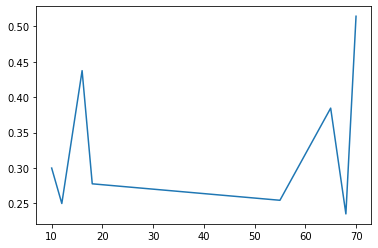

In [87]:
query = '''
    WITH pitches_by_pitcher AS(
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , COUNT(*) AS cnt
        FROM df 
        GROUP BY 1,2,3
    )

    SELECT df.Pitcher
        , df.PitchCall
        , cnt AS total_pitches
        , COUNT(*) AS pitch_call_count
        , 1.0*COUNT(*) / cnt AS percent_tot_pitches
    FROM df
    LEFT JOIN pitches_by_pitcher USING(PitcherId)
    WHERE df.PitchCall = 'BallCalled'
    GROUP BY 1,2,3
    ORDER BY total_pitches DESC
'''
df2 = sqldf(query, globals())
plot(df2.total_pitches, df2.percent_tot_pitches)

Yikes, no pattern given the amount of data given 

In [81]:
# lets look at ball calls that lead to the batter walking 
query = '''
    SELECT Pitcher 
        , Inning 
        , Batter 
        , COUNT(*) AS count_of_balls
    FROM df 
    WHERE PitchCall = 'BallCalled'
    GROUP BY 1,2,3
    HAVING COUNT(*) = 4 -- 4 balls for the batter to walk
'''
sqldf(query, globals())

,Pitcher,Inning,Batter,count_of_balls
0,"Menefee, Joseph",5,"Slavens, Brady",4
1,"Menefee, Joseph",9,"Bohrofen, Jace",4
2,"Smith, Hagen",1,"Moss, Jack",4
3,"Smith, Hagen",2,"Werner, Trevor",4
4,"Smith, Hagen",3,"Rock, Dylan",4
5,"Smith, Hagen",4,"Minnich, Brett",4
6,"Tucker, Wyatt",9,"Slavens, Brady",4


In [82]:
query = '''
    SELECT DISTINCT KorBB
    FROM df 
'''
sqldf(query, globals())

,KorBB
0,Undefined
1,Strikeout
2,Walk


In [84]:
query = '''
    SELECT Pitcher 
        , KorBB
        , COUNT(*) AS cnt 
    FROM df 
    WHERE KorBB <> 'Undefined'
    GROUP BY 1,2
'''
sqldf(query, globals())

,Pitcher,KorBB,cnt
0,"Dallas, Micah",Strikeout,2
1,"Dallas, Micah",Walk,1
2,"Menefee, Joseph",Strikeout,7
3,"Menefee, Joseph",Walk,3
4,"Morris, Zack",Strikeout,1
5,"Morris, Zack",Walk,1
6,"Smith, Hagen",Strikeout,1
7,"Smith, Hagen",Walk,5
8,"Taylor, Evan",Strikeout,2
9,"Tucker, Wyatt",Strikeout,1


From earlier, looks like Ball is the most frequently occuring pitch call in most cases and yields the highest percentage of pitch calls for most pitchers 

In [75]:
query = '''
    WITH pitches_by_pitcher AS(
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , COUNT(*) AS cnt
        FROM df 
        GROUP BY 1,2,3
    )

    SELECT df.Pitcher
        , df.PitchCall
        , cnt AS total_pitches
        , COUNT(*) AS pitch_call_count
        , 1.0*COUNT(*) / cnt AS percent_tot_pitches
    FROM df
    LEFT JOIN pitches_by_pitcher USING(PitcherId)
    WHERE df.PitchCall = 'InPlay'
    GROUP BY 1,2,3
    ORDER BY total_pitches DESC
'''
sqldf(query, globals())

,Pitcher,PitchCall,total_pitches,pitch_call_count,percent_tot_pitches
0,"Smith, Hagen",InPlay,70,10,0.142857
1,"Dallas, Micah",InPlay,68,16,0.235294
2,"Menefee, Joseph",InPlay,65,7,0.107692
3,"Morris, Zack",InPlay,55,8,0.145455
4,"Taylor, Evan",InPlay,18,4,0.222222
5,"Tucker, Wyatt",InPlay,16,1,0.062500
6,"Tygart, Brady",InPlay,12,3,0.250000
7,"Vermillion, Zebulon",InPlay,10,3,0.300000


Let's look at how percentage of PitchCall X on total pitches is impacted by number of pitches made by a player  

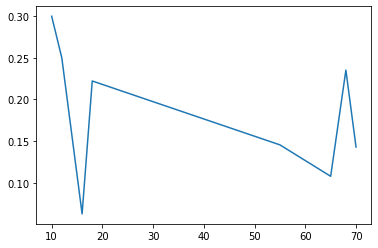

In [88]:
query = '''
    WITH pitches_by_pitcher AS(
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , COUNT(*) AS cnt
        FROM df 
        GROUP BY 1,2,3
    )

    SELECT df.Pitcher
        , df.PitchCall
        , cnt AS total_pitches
        , COUNT(*) AS pitch_call_count
        , 1.0*COUNT(*) / cnt AS percent_tot_pitches
    FROM df
    LEFT JOIN pitches_by_pitcher USING(PitcherId)
    WHERE df.PitchCall = 'InPlay'
    GROUP BY 1,2,3
    ORDER BY total_pitches DESC
'''
df2 = sqldf(query, globals())

plot(df2.total_pitches, df2.percent_tot_pitches)

In [78]:
query = '''
    WITH pitches_by_pitcher AS(
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , COUNT(*) AS cnt
        FROM df 
        GROUP BY 1,2,3
    )

    SELECT df.Pitcher
        , 'Strike' AS PitchCall
        , cnt AS total_pitches
        , COUNT(*) AS pitch_call_count
        , 1.0*COUNT(*) / cnt AS percent_tot_pitches
    FROM df
    LEFT JOIN pitches_by_pitcher USING(PitcherId)
    WHERE df.PitchCall LIKE '%Strike%'
    GROUP BY 1,2,3
    ORDER BY total_pitches DESC
'''
sqldf(query, globals())

,Pitcher,PitchCall,total_pitches,pitch_call_count,percent_tot_pitches
0,"Smith, Hagen",Strike,70,15,0.214286
1,"Dallas, Micah",Strike,68,20,0.294118
2,"Menefee, Joseph",Strike,65,30,0.461538
3,"Morris, Zack",Strike,55,14,0.254545
4,"Taylor, Evan",Strike,18,9,0.500000
5,"Tucker, Wyatt",Strike,16,4,0.250000
6,"Tygart, Brady",Strike,12,6,0.500000
7,"Vermillion, Zebulon",Strike,10,3,0.300000


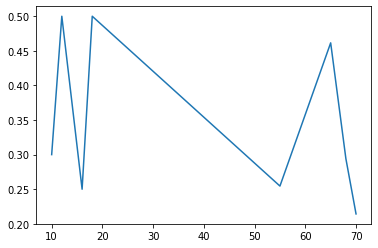

In [89]:
query = '''
    WITH pitches_by_pitcher AS(
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , COUNT(*) AS cnt
        FROM df 
        GROUP BY 1,2,3
    )

    SELECT df.Pitcher
        , 'Strike' AS PitchCall
        , cnt AS total_pitches
        , COUNT(*) AS pitch_call_count
        , 1.0*COUNT(*) / cnt AS percent_tot_pitches
    FROM df
    LEFT JOIN pitches_by_pitcher USING(PitcherId)
    WHERE df.PitchCall LIKE '%Strike%'
    GROUP BY 1,2,3
    ORDER BY total_pitches DESC
'''
df2 = sqldf(query, globals())
plot(df2.total_pitches, df2.percent_tot_pitches)

Let's look at pitch performance over time

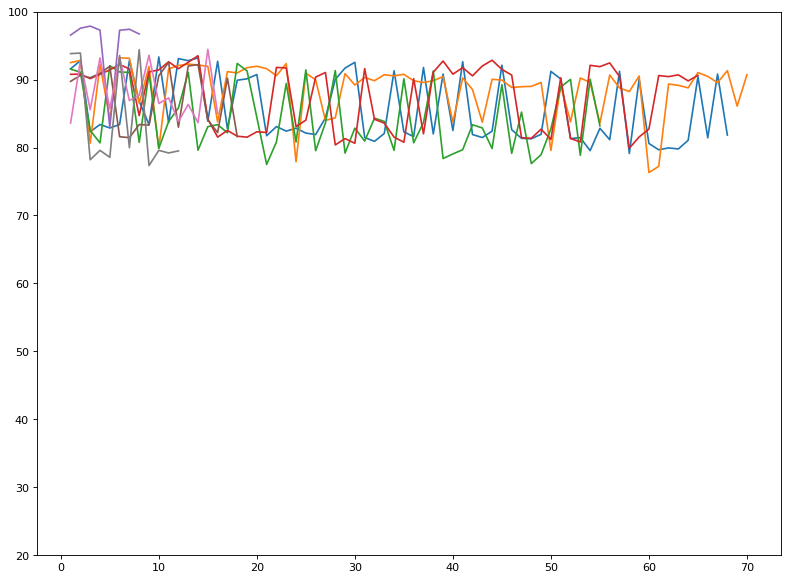

In [103]:
# pitch speed 
pitchers = df.PitcherId.unique()

figure(figsize=(12, 9), dpi=80)
plt.ylim(20, 100)

for pitcher in pitchers: 
    query = f'''
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , Inning
            , Time 
            , RelSpeed
            , SpinRate
            , RelHeight
            , PitchCall
            , PlayResult
            , ROW_NUMBER() OVER (PARTITION BY PitcherId ORDER BY Time) AS pitch_num
        FROM df 
        WHERE PitcherId = {pitcher}

    '''
    df2 = sqldf(query, globals())
    # sqldf(query, globals())
    plot(df2.pitch_num, df2.RelSpeed)

No Real observable pattern from above line plot and pitchers often seem volatile

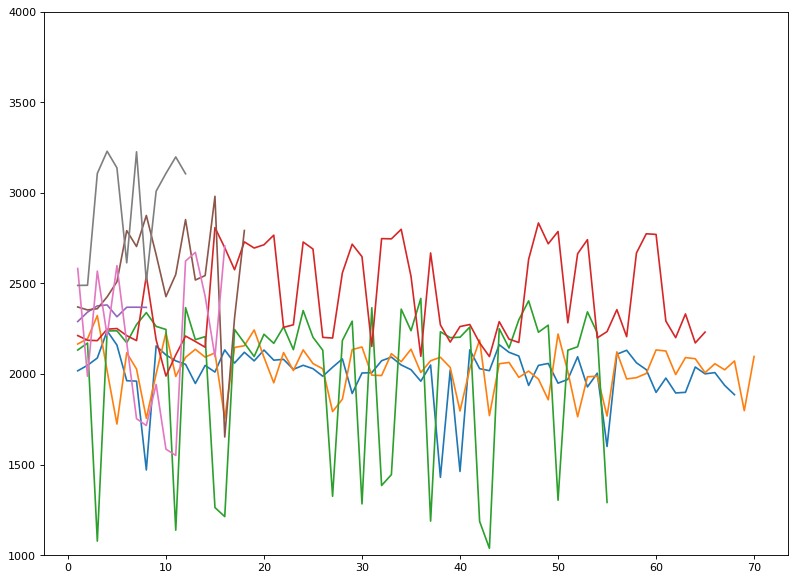

In [108]:
# pitch spin  - not entierly sure the impact spin has on the quality of pitch 
pitchers = df.PitcherId.unique()

figure(figsize=(12, 9), dpi=80)
plt.ylim(1000, 4000)

for pitcher in pitchers: 
    query = f'''
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , Inning
            , Time 
            , RelSpeed
            , SpinRate
            , RelHeight
            , PitchCall
            , PlayResult
            , ROW_NUMBER() OVER (PARTITION BY PitcherId ORDER BY Time) AS pitch_num
        FROM df 
        WHERE PitcherId = {pitcher}

    '''
    df2 = sqldf(query, globals())
    # sqldf(query, globals())
    plot(df2.pitch_num, df2.SpinRate)

Line plots aren't giving much valuable information, let's try another visual

['Dallas, Micah', 'Smith, Hagen', 'Morris, Zack', 'Menefee, Joseph', 'Vermillion, Zebulon', 'Taylor, Evan', 'Tucker, Wyatt', 'Tygart, Brady']


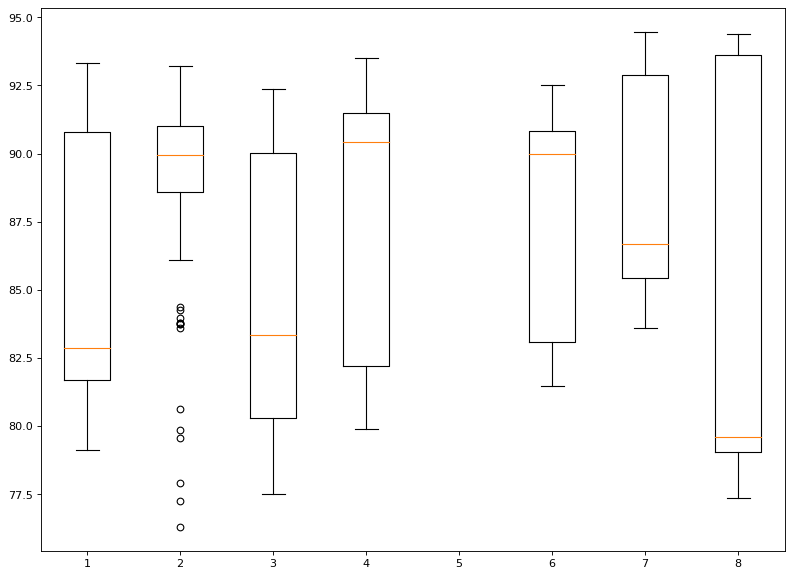

In [116]:
pitchers = df.PitcherId.unique()

figure(figsize=(12, 9), dpi=80)

speeds = []
pitcher_names = []
for pitcher in pitchers: 
    query = f'''
        SELECT PitcherId
            , Pitcher
            , PitcherTeam
            , Inning
            , Time 
            , RelSpeed
            , SpinRate
            , RelHeight
            , PitchCall
            , PlayResult
            , ROW_NUMBER() OVER (PARTITION BY PitcherId ORDER BY Time) AS pitch_num
        FROM df 
        WHERE PitcherId = {pitcher}
    '''
    df2 = sqldf(query, globals())
    pitcher_names.append(df2.Pitcher.unique()[0])
    speeds.append(df2.RelSpeed)

plt.boxplot(speeds)
print(pitcher_names)

It appears that Hagen Smith is the most consistent pitcher (although he has a number of outliers) and typically has faster pitches. It also appears that he has one of the greatest medians for pitch speed. 

vs someone like Evan Taylor or Wyatt Tucker whose distribution is much more spread and whose medians are far lower 

In [117]:
query = f'''
    SELECT PitcherId
        , Pitcher
        , PitcherTeam
        , COUNT(*) AS cnt
    FROM df 
    GROUP BY 1,2,3
    '''
sqldf(query, globals())

,PitcherId,Pitcher,PitcherTeam,cnt
0,8899005,"Vermillion, Zebulon",ARK_RAZ,10
1,1000013739,"Taylor, Evan",ARK_RAZ,18
2,1000015697,"Menefee, Joseph",TEX_AGG,65
3,1000047549,"Morris, Zack",ARK_RAZ,55
4,1000058245,"Dallas, Micah",TEX_AGG,68
5,1000072172,"Smith, Hagen",ARK_RAZ,70
6,1000091435,"Tygart, Brady",ARK_RAZ,12
7,1000113699,"Tucker, Wyatt",TEX_AGG,16


Given the sample size constraints, it is hard to conclude that, say Hagen Smith is a better pitcher than Wyatt Tucker since Smith had almost 5 times as many pitches. That means there are far more samples to look at and allows Smith's pitches to approach a normal distribution 

### Look at num walks, strike outs, balls, number of innings pitched, avg_speed, avg_spin, etc per player in a report like fashion 

In [149]:
query = '''
    SELECT Pitcher
        , PitcherTeam
        , AVG(RelSpeed) AS avg_pitch_speed
        , AVG(SpinRate) AS avg_pitch_spin
        , AVG(RelHeight) AS avg_pitch_height
        , SUM(CASE WHEN PitchCall = 'BallCalled' THEN 1 ELSE 0 END) AS num_balls
        , SUM(CASE WHEN PitchCall LIKE '%Strike%' THEN 1 ELSE 0 END) AS num_strikes
        , SUM(CASE WHEN PitchCall = 'InPlay' THEN 1 ELSE 0 END) AS num_in_play_pitches
        , SUM(CASE WHEN KorBB = 'Walk' THEN 1 ELSE 0 END) AS walks 
        , SUM(CASE WHEN KorBB = 'StrikeOut' THEN 1 ELSE 0 END) AS strike_outs 
        , COUNT(*) AS num_pitches
    FROM df 
    GROUP BY Pitcher
    ORDER BY num_pitches DESC
'''
sqldf(query, globals())

,Pitcher,PitcherTeam,avg_pitch_speed,avg_pitch_spin,avg_pitch_height,num_balls,num_strikes,num_in_play_pitches,walks,strike_outs,num_pitches
0,"Smith, Hagen",ARK_RAZ,88.671159,2030.931531,5.502387,36,15,10,5,0,70
1,"Dallas, Micah",TEX_AGG,85.533255,2004.695147,6.138348,16,20,16,1,0,68
2,"Menefee, Joseph",TEX_AGG,87.470557,2413.015099,6.080461,25,30,7,3,0,65
3,"Morris, Zack",ARK_RAZ,84.485986,2002.849654,5.749700,14,14,8,1,0,55
4,"Taylor, Evan",ARK_RAZ,87.308047,2537.438978,5.223024,5,9,4,0,0,18
5,"Tucker, Wyatt",TEX_AGG,88.086371,2199.658420,6.136772,7,4,1,1,0,16
6,"Tygart, Brady",ARK_RAZ,83.967388,2935.184206,5.649797,3,6,3,0,0,12
7,"Vermillion, Zebulon",ARK_RAZ,95.567553,2340.086274,6.334113,3,3,3,0,0,10


In [155]:
# percent
query = '''

    WITH abs_numbers AS(
        SELECT Pitcher
            , PitcherId
            , PitcherTeam
            , AVG(RelSpeed) AS avg_pitch_speed
            , AVG(SpinRate) AS avg_pitch_spin 
            , AVG(RelHeight) AS avg_pitch_height
            , SUM(CASE WHEN PitchCall = 'BallCalled' THEN 1 ELSE 0 END) AS num_balls
            , SUM(CASE WHEN PitchCall LIKE '%Strike%' THEN 1 ELSE 0 END) AS num_strikes
            , SUM(CASE WHEN PitchCall = 'InPlay' THEN 1 ELSE 0 END) AS num_in_play_pitches
            , SUM(CASE WHEN KorBB = 'Walk' THEN 1 ELSE 0 END) AS walks 
            , SUM(CASE WHEN KorBB = 'StrikeOut' THEN 1 ELSE 0 END) AS strike_outs 
            , COUNT(*) AS num_pitches
        FROM df 
        GROUP BY Pitcher
        -- ORDER BY num_pitches DESC
    ) 

    SELECT Pitcher 
        , PitcherId
        , PitcherTeam
        , avg_pitch_speed
        , avg_pitch_spin 
        , avg_pitch_height
        , 1.0 * num_balls / num_pitches AS percent_pitches_ball
        , 1.0 * num_strikes / num_pitches AS percent_pitches_stike
        , 1.0 * num_in_play_pitches / num_pitches AS percent_pitches_in_play
        , 1.0 * walks / num_pitches AS walks_over_pitches 
        , num_pitches
    FROM abs_numbers
    ORDER BY num_pitches DESC
'''
pitching_data = sqldf(query, globals())
pitching_data

,Pitcher,PitcherId,PitcherTeam,avg_pitch_speed,avg_pitch_spin,avg_pitch_height,percent_pitches_ball,percent_pitches_stike,percent_pitches_in_play,walks_over_pitches,num_pitches
0,"Smith, Hagen",1000072172,ARK_RAZ,88.671159,2030.931531,5.502387,0.514286,0.214286,0.142857,0.071429,70
1,"Dallas, Micah",1000058245,TEX_AGG,85.533255,2004.695147,6.138348,0.235294,0.294118,0.235294,0.014706,68
2,"Menefee, Joseph",1000015697,TEX_AGG,87.470557,2413.015099,6.080461,0.384615,0.461538,0.107692,0.046154,65
3,"Morris, Zack",1000047549,ARK_RAZ,84.485986,2002.849654,5.749700,0.254545,0.254545,0.145455,0.018182,55
4,"Taylor, Evan",1000013739,ARK_RAZ,87.308047,2537.438978,5.223024,0.277778,0.500000,0.222222,0.000000,18
5,"Tucker, Wyatt",1000113699,TEX_AGG,88.086371,2199.658420,6.136772,0.437500,0.250000,0.062500,0.062500,16
6,"Tygart, Brady",1000091435,ARK_RAZ,83.967388,2935.184206,5.649797,0.250000,0.500000,0.250000,0.000000,12
7,"Vermillion, Zebulon",8899005,ARK_RAZ,95.567553,2340.086274,6.334113,0.300000,0.300000,0.300000,0.000000,10


Let's dig in and look at a single pitcher with multiple innings pitching and see how he performs 

As we saw earlier, there was no noticable pattern when looking at metrics over the number of pitches  

Going to investigate speed as an indicator in particular to maybe flag a pitcher's fatigue

In [156]:
# Hagen has the most pitches so lets look at him 
query = '''
    SELECT PitcherId
        , Pitcher
        , PitcherTeam
        , Inning 
        , RelSpeed
        , SpinRate
        , RelHeight
        , ROW_NUMBER() OVER (ORDER BY Inning, Time DESC) AS pitch_num
    FROM df 
    WHERE PitcherId = 1000072172
    ORDER BY Inning, Time DESC
'''
hagen = sqldf(query, globals())
hagen

,PitcherId,Pitcher,PitcherTeam,Inning,RelSpeed,SpinRate,RelHeight,pitch_num
0,1000072172,"Smith, Hagen",ARK_RAZ,1,92.34708,2019.159429,5.52969,1
1,1000072172,"Smith, Hagen",ARK_RAZ,1,90.57362,2118.417589,5.55014,2
2,1000072172,"Smith, Hagen",ARK_RAZ,1,91.60434,1951.520211,5.49874,3
3,1000072172,"Smith, Hagen",ARK_RAZ,1,91.95919,2092.643846,5.58483,4
4,1000072172,"Smith, Hagen",ARK_RAZ,1,91.74653,2243.070737,5.43201,5
...,...,...,...,...,...,...,...,...
65,1000072172,"Smith, Hagen",ARK_RAZ,4,88.78433,2084.402759,5.53918,66
66,1000072172,"Smith, Hagen",ARK_RAZ,4,89.14887,2090.824314,5.51207,67
67,1000072172,"Smith, Hagen",ARK_RAZ,4,89.34170,1996.967393,5.58811,68
68,1000072172,"Smith, Hagen",ARK_RAZ,4,77.23265,2127.028342,5.71568,69


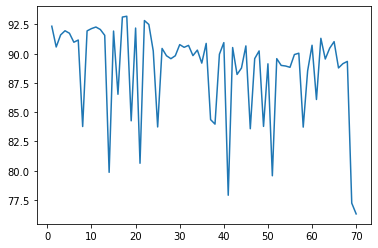

In [145]:
plot(hagen.pitch_num, hagen.RelSpeed)

Looking at the speed of Hagen's pitches over the course of the game, we see they range between 92 and 77 with a lot of volatility between pitches, however, we do see a slight decline in the trend of this plot starting at around pitch 20. 

Let's look at multiple pitchers that threw fewer pitches and combine their data to see the trend of their performance 

In [154]:
query = '''
    SELECT PitcherId
        , Pitcher
        , PitcherTeam
        , Inning 
        , RelSpeed
        , SpinRate
        , RelHeight
        , ROW_NUMBER() OVER (ORDER BY Inning, Time DESC) AS pitch_num
    FROM df 
    WHERE PitcherId IN (1000013739, 1000091435, 8899005) 
    ORDER BY Inning, Time DESC
'''
combined_pitchers = sqldf(query, globals())
combined_pitchers.head()

,PitcherId,Pitcher,PitcherTeam,Inning,RelSpeed,SpinRate,RelHeight,pitch_num
0,1000013739,"Taylor, Evan",ARK_RAZ,7,90.26817,2360.316572,5.06309,1
1,1000013739,"Taylor, Evan",ARK_RAZ,7,90.61774,2353.730611,5.13085,2
2,1000013739,"Taylor, Evan",ARK_RAZ,7,89.73481,2370.003450,5.18399,3
3,8899005,"Vermillion, Zebulon",ARK_RAZ,7,96.51997,2251.393899,6.36325,4
4,8899005,"Vermillion, Zebulon",ARK_RAZ,7,NaN,NaN,NaN,5


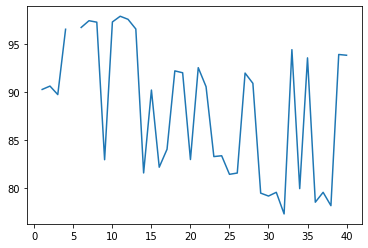

In [153]:
plot(combined_pitchers.pitch_num, combined_pitchers.RelSpeed)

In this plot we also see a decline in pitch speed (although the plot is still rather volatile), but it is worth noting that the relative speeds are slightly higher and the minimum speed is not as low as for Hagen. With all this being said, it seems as though frequent substitution does not greatly impact how well the pitches are thrown. 

I am also aware that there are many other external factors that goes into how a pitcher plays and outcomes are often dependant on who is batting, etc as well 

I assume that Hagen is ARK's top pitcher based on how much he pitches and so based on this analysis, since he is the strongest pitcher, his number of pitches don't seem to impact his performance anymore than having frequent substitutions 

For further extensions to this, we could look at metrics other than speed as well as look into a Pitcher's performance in back to back or consecutive games or use more sample data to try and find patterns 